**************************************************INITIALIZATION*********************************************************

In [1]:
from tjmonopix.tjmonopix import TJMonoPix
import numpy as np
#from tjmonopix.analysis.plotting import plotting
import time

#plot=plotting()
chip = TJMonoPix(conf="../tjmonopix/tjmonopix_mio3.yaml",no_power_reset=True)
chip.init(fl="EN_HV")

# chip['data_rx'].CONF_START_FREEZE = 15 #default 3
# chip['data_rx'].CONF_STOP_FREEZE = 100 #default 40
# #chip['data_rx'].CONF_STOP_FREEZE = 250 #default 40
# chip['data_rx'].CONF_START_READ = 35 #default 6
# chip['data_rx'].CONF_STOP_READ = 37 #default 7
# chip['data_rx'].CONF_STOP = 105 #default 45
# #chip['data_rx'].CONF_STOP = 255 #default 45

chip['data_rx'].CONF_START_FREEZE = 64 #default 3
chip['data_rx'].CONF_STOP_FREEZE = 100 #default 40
chip['data_rx'].CONF_START_READ = 66 #default 6
chip['data_rx'].CONF_STOP_READ = 68 #default 7
chip['data_rx'].CONF_STOP = 105 #default 45


#-------------------------------------------------#
chip.set_icasn_dacunits(0,0)
chip.set_vreset_dacunits(35,0)
chip.set_ireset_dacunits(2,1,0)
chip.set_ithr_dacunits(5,0)
chip.set_idb_dacunits(50,0)

chip['CONF_SR']['EN_HV'].setall(False)
chip['CONF_SR']['EN_COMP'].setall(False)
chip['CONF_SR']['EN_PMOS'].setall(False)
chip['CONF_SR']['EN_PMOS_NOSF'].setall(False)
chip['CONF_SR']['EN_TEST_PATTERN'].setall(False)

chip['CONF_SR']['MASKD'].setall(False)
chip['CONF_SR']['MASKH'].setall(False)
chip['CONF_SR']['MASKV'].setall(False)

chip.write_conf()

chip['CONF']['DEF_CONF_N'] = 1
chip['CONF'].write()

2019-04-03 21:06:15,332 [INFO ] (MainThread) ########GPAC                 #####
2019-04-03 21:06:15,333 [INFO ] (MainThread) ########SKIPPING POWER RESET #####
2019-04-03 21:06:17,053 [INFO ] (MainThread) Found adapter card: General Purpose Analog Card with ID 13
2019-04-03 21:06:17,267 [INFO ] (MainThread) Found board 0 running firmware version 0.5


FPGA module basil.HL.tlu does not satisfy version requirements (read: 10, require: ==11)


2019-04-03 21:06:17,992 [INFO ] (MainThread) {'VPC [V]': 0.8968192194291438, 'VDDA_DAC [mA]': 567.1670178167402, 'VDDP [V]': 1.7913174844533601, 'VDDD [V]': 1.7921228324974925, 'VDDA [mA]': 577.0899264452138, 'VPC [mA]': -0.32002818589178506, 'VDDD [mA]': 569.4866960087318, 'VPCSWSF [V]': 0.8973983967065867, 'VDDP [mA]': 575.548350884382, 'BiasSF [V]': 0.8971388147553919, 'VPCSWSF [mA]': -0.32130961215949544, 'VDDA [V]': 1.7921857260956175, 'VDDA_DAC [V]': 1.7915526135458166, 'BiasSF [mA]': -0.32389637762237766}


****************************************************POWER_STATUS*********************************************************

In [2]:
#chip['BiasSF'].set_current(100, unit='uA') # SET THE SOURCE FOLLOWER READOUT CURRENT
chip.get_power_status()

{'BiasSF [V]': 0.8971388147553919,
 'BiasSF [mA]': -0.32389637762237766,
 'VDDA [V]': 1.7921857260956175,
 'VDDA [mA]': 577.0899264452138,
 'VDDA_DAC [V]': 1.7915526135458166,
 'VDDA_DAC [mA]': 567.1670178167402,
 'VDDD [V]': 1.7921228324974925,
 'VDDD [mA]': 569.4866960087318,
 'VDDP [V]': 1.7913174844533601,
 'VDDP [mA]': 575.548350884382,
 'VPC [V]': 0.8968192194291438,
 'VPC [mA]': -0.32002818589178506,
 'VPCSWSF [V]': 0.8973983967065867,
 'VPCSWSF [mA]': -0.32130961215949544}

****************************ENABLE_COLUMS, SET MASKS, SELECT WHICH COLUMN AND ROW TO INJECT******************************

In [3]:
# SELECT WHICH DOUBLE COLUMNS TO ENABLE
chip['CONF_SR']['EN_PMOS_NOSF'].setall(False)
chip['CONF_SR']['EN_PMOS'].setall(False)
chip['CONF_SR']['EN_COMP'].setall(False)
chip['CONF_SR']['EN_HV'].setall(True)
chip['CONF_SR']['EN_OUT'].setall(False) #ENABLES OR DISABLES THE NORMAL OUTPUT PADS, ACTIVE LOW
chip['CONF_SR']['nEN_OUT'].setall(True) #ENABLES OR DISABLES THE COMPLEMENTARY OUTPUT PADS, ACTIVE LOW
chip['CONF_SR']['EN_HITOR_OUT'].setall(True) #ENABLES OR DISABLES THE NORMAL HITOR PADS, HITOR0-3 =  1-4 flavor, ACTIVE LOW
chip['CONF_SR']['nEN_HITOR_OUT'].setall(True) #ENABLES OR DISABLES THE COMPLEMENTARY HITOR PADS, ACTIVE LOW

#chip['CONF_SR']['EN_HV'][9] = 1
chip['CONF_SR']['EN_HV'].setall(True)
#chip['CONF_SR']['EN_HITOR_OUT'][1] = 0

# SELECT WHICH PHYSICAL COLUMNS, ROWS, DIAGONALS TO MASK
# TO MASK ONE PIXEL, MASKV, MASKH and MASKD OF THIS PIXEL SHOULD BE 0 (FALSE)
# THE MASKD NUMBER OF THE PIXEL WE WANT TO MASK (or UNMASK), IS GIVEN BY: MASKD = PHYSCOL- PHYSROW
# IF PHYSCOL-PHYSROW<0, then MASKD = 448+PHYSCOL-PHYSROW
chip['CONF_SR']['MASKD'].setall(True)
chip['CONF_SR']['MASKH'].setall(True)
chip['CONF_SR']['MASKV'].setall(True)

# TO USE THE MASK FUNCTION YOU MUST INPUT THE FLAVOR, COLUMN AND ROW
# THE FLAVOR NUMERS IS: 0 FOR PMOS_NOSF, 1 FOR PMOS, 2 FOR COMP, 3 FOR HV

#chip['CONF_SR']['MASKD'][31] = True
#chip['CONF_SR']['MASKH'][99] = False

# SELECT WHICH PHYSICAL COLUMS TO INJECT
# INJ_IN_MON_L AND INJ_IN_MON_L SELECT THE LEFT AND RIGHT SPECIAL ANALOG MONITORING PIXELS
chip['CONF_SR']['COL_PULSE_SEL'].setall(False)
#chip['CONF_SR']['COL_PULSE_SEL'][130]=True

chip['CONF_SR']['INJ_IN_MON_L'] = 1 # ENABLE INJECTION FOR THE ANALOG MONITORING PIXELS LEFT SIDE
chip['CONF_SR']['INJ_IN_MON_R'] = 1 # ENABLE INJECTION FOR THE ANALOG MONITORING PIXELS RIGHT SIDE

# SELECT WHICH PHYSICAL ROWS TO INJECT
# THE SPEXIAL PIXELS OUTA_MON3 to OUTA_MON0 CORRESPONT TO ROWS 223 to 220 FOR INJECTION
chip['CONF_SR']['INJ_ROW'].setall(False)
chip['CONF_SR']['INJ_ROW'][223:220] = True # FOR THE ANALOG MONITORING TOP PIXEL

# SELECT PHYSICAL COLUMNS AND ROWS FOR INJECTION WITH FUNCTION
chip.enable_injection(3,18,99)

# SELECT PHYSICAL COLUMN(S) FOR HITOR OUTPUT
# nMASKH (SO SETTING MASKH TO FALSE) ENABLES HITOR FOR THE SPECIFIC ROW
chip['CONF_SR']['DIG_MON_SEL'].setall(False)
#chip.enable_column_hitor(1,18)

chip.write_conf()

In [5]:
# chip['data_rx'].CONF_START_FREEZE = 64 #default 3
# chip['data_rx'].CONF_STOP_FREEZE = 100 #default 40
# chip['data_rx'].CONF_START_READ = 66 #default 6
# chip['data_rx'].CONF_STOP_READ = 68 #default 7
# chip['data_rx'].CONF_STOP = 105 #default 45

#chip['data_rx'].reset()
#chip['CONF']['AB_SELECT'] = 1
#chip['CONF'].write()

chip['data_rx'].set_en(True)

x = chip['fifo'].get_data()

ix = chip.interpret_data(x)
print(len(ix))
print(ix)

25088
[(  0, 223, 0,  0, 0) (  1, 223, 0, 14, 0) (  0, 222, 0,  0, 0) ...,
 (111,   1, 0,  0, 0) (110,   0, 0,  0, 0) (111,   0, 0,  0, 0)]


************CONFIGURE THE FRONT END CURRENT AND VOLTAGE BIASES, CONFIGURE THE HEIGHT OF THE INJECTION PULSE**************

In [6]:
## SET THE INJECTION PULSE AMPLITUDE
## 128-bit DAC (7-bit binary equivalent)
## SET THE VOLTAGES IN ONE HOT ENCODING, ONLY ONE BIT ACTIVE AT A TIME.
## V = (127/1.8)*#BIT
# The default values are VL=44, VH=79, VH-VL=35
# VDAC LSB=14.17mV, Cinj=230aF, 1.43e-/mV, ~710e-
chip.set_vl_dacunits(40,1)
chip.set_vh_dacunits(80,1)

####### CONFIGURE THE FRONT END ######

# SET VRESET_P, THIS IS THE BASELINE OF THE FRONT END INPUT, ONE HOT ENCODING
chip.set_vreset_dacunits(35,1) #1V

## 128-bit DAC (7-bit binary equivalent)
## SET THE CURRENTS USING THERMOMETER ENCODING, I = #BITS_ACTIVE*140nA*SCALING, SCALING IS DIFFERENT FOR EACH CURRENT
## SCALING: IBIAS=10, IDB=16, ITHR=0.125, ICASN=4, IRESET=0.03125
## ACTIVE BITS SHOULD BE SET STARTING FROM THE MIDDLE e.g. for 15 active bits, (128-15)/2=56,5 so 56zeros,15ones,57zeros
## Thus, Ix[71:57] = True

# SET ICASN, THIS CURRENT CONTROLS THE OUTPUT BASELINE, BE CAREFUL NOT TO SET IT TO HIGH
# ALWAYS MONITOR THE POWER AFTER SETTING ICASN. IF VDDD IS SEVERAL mA, REDUCE IT UNTIL IT RETURNS TO 0
# ICASN MAINLY CONTROLS THE THRESHOLD
chip.set_icasn_dacunits(0,1) #4.375nA # approx 1.084V at -3V backbias, 600mV at 0V backbias

# SET IRESET, THIS CURRENT CONTROLS THE RESET RATE OF THE FRONT END INPUT (ALSO THE THRESHOLD)
chip.set_ireset_dacunits(2,1,1) #270pA, HIGH LEAKAGE MODE, NORMAL SCALING, 0 = LOW LEAKAGE MODE, SCALING*0.01

# SET ITHR, THIS CURRENT CONTROLS THE RESET RATE OF THE OUTPUT (AND THE THRESHOLD)
chip.set_ithr_dacunits(5,1) #680pA

# SET ITHR, THIS CURRENT CONTROLS THE BIASING OF THE DISCRIMINATOR (AND THE THRESHOLD)
chip.set_idb_dacunits(20,1) #500nA

# SET IBIAS, THIS CURRENT IS THE DC CURRENT OF THE MAIN BRANCH OF THE FRONT END THAT PROVIDES AMPLIFICATION
# IT CONTROLS MAINLY THE RISE TIME
chip.set_ibias_dacunits(50,1) #500nA

############ ENABLE THE DAC CURRENT MONITORING ###########
# chip['CONF_SR']['SWCNTL_DACMONI'] = 0

########## SET THE BIAS CURRENTS OF THE TWO STAGE SOURCE FOLLOWER THAT BUFFERS THE ANALOG MONITORING VOLTAGES #########
# CONTROLS THE RESPONSE TIME AND THE LEVEL SHIFT OF THE BUFFER
# chip['CONF_SR']['SET_IBUFN_L'] = 0b1001
# chip['CONF_SR']['SET_IBUFP_L'] = 0b0101

chip.write_conf()

2019-04-03 21:06:31,345 [INFO ] (MainThread) vl = 0.951929133858V
2019-04-03 21:06:31,348 [INFO ] (MainThread) vh = 1.51885826772V
2019-04-03 21:06:31,349 [INFO ] (MainThread) vreset = 1.05106299213V
2019-04-03 21:06:31,358 [INFO ] (MainThread) icasn = 0
2019-04-03 21:06:31,359 [INFO ] (MainThread) icasn = 4.375nA
2019-04-03 21:06:31,361 [INFO ] (MainThread) ireset = 2 high leakage mode
2019-04-03 21:06:31,362 [INFO ] (MainThread) ireset = 0.1025390625nA, high leakage mode
2019-04-03 21:06:31,364 [INFO ] (MainThread) ithr = 5
2019-04-03 21:06:31,365 [INFO ] (MainThread) ithr = 0.8203125nA
2019-04-03 21:06:31,367 [INFO ] (MainThread) idb = 20
2019-04-03 21:06:31,368 [INFO ] (MainThread) idb = 367.5nA
2019-04-03 21:06:31,369 [INFO ] (MainThread) ibias = 50
2019-04-03 21:06:31,371 [INFO ] (MainThread) ibias = 557.8125nA


******************INITIALIZE COMMUNICATION, RECEIVE DATA (CHECK IF DATA ARE SENT WITH EACH EXCECUTION)*******************

In [7]:
for _ in range(10):
    chip['fifo'].reset()
    time.sleep(0.002)
time.sleep(1)
x = chip['fifo'].get_data()
ix = chip.interpret_data(x)
print(len(ix))
uni,cnt=np.unique(ix[["col","row"]],return_counts=True)
arg=np.argsort(cnt)
for a_i,a in enumerate(arg[::-1]):
    print uni[a],cnt[a]
    chip.mask(3,uni[a][0],uni[a][1])
chip.write_conf()   

51556
(59, 212) 45963
(28, 159) 3734
(81, 180) 1196
(35, 126) 431
(107, 7) 100
(111, 54) 68
(55, 210) 17
(67, 119) 14
(104, 77) 11
(38, 162) 8
(32, 95) 8
(58, 2) 3
(78, 90) 1
(64, 100) 1
(47, 204) 1


In [ ]:
#### option (external ICASN)
chip['DACMON_ICASN'].set_current(0, unit='uA')
chip['CONF_SR']['SWCNTL_ICASN']=True
chip.write_conf()
time.sleep(1)
print chip['DACMON_ICASN'].get_voltage()
print chip['DACMON_ICASN'].get_current()

****************************SET THE INJECTION PULSE PARAMETERS, INJECT x times and get the data**************************

In [ ]:
#chip['CONF_SR']['COL_PULSE_SEL'].setall(False)
#chip['CONF_SR']['INJ_ROW'].setall(False)
#chip['CONF_SR']['INJ_ROW'][223:220]=True
#chip.write_conf()
delay=800
width=250
repeat=100
chip['inj'].set_delay(delay)
chip['inj'].set_width(width)
chip['inj'].set_repeat(repeat)
chip['inj'].set_phase(0)
chip['inj'].set_en(0)

col=18
row=25
chip['CONF_SR']['INJ_ROW'].setall(False)
chip['CONF_SR']['COL_PULSE_SEL'].setall(False)
chip.enable_injection(3,col,row)

chip.set_vl_dacunits(35,1)
chip.set_vh_dacunits(100,1)
chip.write_conf()
for _ in range(5):
    chip['fifo'].reset()
    time.sleep(0.002)
chip["inj"].start()
while not chip['inj'].is_ready:
    time.sleep(0.001)
time.sleep(0.2)
print chip['fifo'].get_fifo_size()
x = chip['fifo'].get_data()
ix = chip.interpret_data(x)
uni,cnt=np.unique(ix[["col","row"]],return_counts=True)
arg=np.argsort(cnt)
for a_i,a in enumerate(arg[::-1]):
    print uni[a],cnt[a]

In [ ]:
for _ in range(5):
    chip['fifo'].reset()
    time.sleep(0.002)
chip.reset_ibias()

chip.auto_mask()

In [8]:
delay=800
width=250
repeat=100
chip['inj'].set_delay(delay)
chip['inj'].set_width(width)
chip['inj'].set_repeat(repeat)
chip['inj'].set_phase(0)
chip['inj'].set_en(0)

col=18
row=25
chip.set_vl_dacunits(40,1)
chip.set_vh_dacunits(54,1)
chip.set_idb_dacunits(20,1)

chip['CONF_SR']['MASKV'].setall(False)
chip['CONF_SR']['MASKH'].setall(False)
chip['CONF_SR']['MASKD'].setall(False)
chip['CONF_SR']['MASKH'][row]=True
chip['CONF_SR']['EN_HV'][col//2]=True
chip.write_conf()
for _ in range(5):
    chip['fifo'].reset()
    time.sleep(0.002)
chip.reset_ibias()

import tjmonopix.scans.injection_scan
reload(tjmonopix.scans.injection_scan)
scans=tjmonopix.scans.injection_scan.InjectionScan(dut=chip)

pix=[3,col,row]
injlist=np.arange(73,0,-1)
thlist= None #np.arange(80,20,-1)
phaselist=None
scans.start(pix=pix,injlist=injlist,thlist=thlist,phaselist=phaselist,with_mon=False,n_mask_pix=1,debug=3)

2019-04-03 21:06:44,223 [INFO ] (MainThread) vl = 0.951929133858V
2019-04-03 21:06:44,224 [INFO ] (MainThread) vh = 1.15035433071V
2019-04-03 21:06:44,226 [INFO ] (MainThread) idb = 20
2019-04-03 21:06:44,227 [INFO ] (MainThread) idb = 367.5nA
2019-04-03 21:06:44,369 [INFO ] (MainThread) Initializing InjectionScan
2019-04-03 21:06:44,846 [INFO ] (MainThread) power status: {'VPC [V]': 0.8968192194291438, 'VDDA_DAC [mA]': 567.1670178167402, 'VDDP [V]': 1.7913174844533601, 'VDDD [V]': 1.7921228324974925, 'VDDA [mA]': 577.0899264452138, 'VPC [mA]': -0.32002818589178506, 'VDDD [mA]': 569.4866960087318, 'VPCSWSF [V]': 0.8973983967065867, 'VDDP [mA]': 575.548350884382, 'BiasSF [V]': 0.8971388147553919, 'VPCSWSF [mA]': -0.32130961215949544, 'VDDA [V]': 1.7921857260956175, 'VDDA_DAC [V]': 1.7915526135458166, 'BiasSF [mA]': -0.32389637762237766}
2019-04-03 21:06:44,933 [INFO ] (MainThread) Creating ZMQ context
2019-04-03 21:06:44,934 [INFO ] (MainThread) Creating socket connection to server tcp:

++++++++ injlist 73 [73 72 71 70 69 68 67 66 65 64 63 62 61 60 59 58 57 56 55 54 53 52 51 50 49
 48 47 46 45 44 43 42 41 40 39 38 37 36 35 34 33 32 31 30 29 28 27 26 25 24
 23 22 21 20 19 18 17 16 15 14 13 12 11 10  9  8  7  6  5  4  3  2  1]
++++++++ thlist 1 [20]
++++++++ phaselist 1 [0]
++++++++ with_mon False


2019-04-03 21:06:45,395 [INFO ] (MainThread) Set timestamp: src=inj
2019-04-03 21:06:45,951 [INFO ] (MainThread) Starting FIFO readout
2019-04-03 21:06:45,953 [INFO ] (MainThread) vh = 1.98657480315V
2019-04-03 21:06:45,967 [INFO ] (MainThread) mask=0 th=20.000 inj=73.000 phase=0 dat=365
2019-04-03 21:06:45,971 [INFO ] (MainThread) vh = 1.9724015748V
2019-04-03 21:06:45,983 [INFO ] (MainThread) mask=0 th=20.000 inj=72.000 phase=0 dat=700
2019-04-03 21:06:45,987 [INFO ] (MainThread) vh = 1.95822834646V
2019-04-03 21:06:46,006 [INFO ] (MainThread) mask=0 th=20.000 inj=71.000 phase=0 dat=1035
2019-04-03 21:06:46,010 [INFO ] (MainThread) vh = 1.94405511811V
2019-04-03 21:06:46,023 [INFO ] (MainThread) mask=0 th=20.000 inj=70.000 phase=0 dat=365
2019-04-03 21:06:46,027 [INFO ] (MainThread) vh = 1.92988188976V
2019-04-03 21:06:46,171 [INFO ] (MainThread) mask=0 th=20.000 inj=69.000 phase=0 dat=700
2019-04-03 21:06:46,176 [INFO ] (MainThread) vh = 1.91570866142V
2019-04-03 21:06:46,195 [INFO 

2019-04-03 21:06:47,166 [INFO ] (MainThread) mask=0 th=20.000 inj=21.000 phase=0 dat=700
2019-04-03 21:06:47,172 [INFO ] (MainThread) vh = 1.23539370079V
2019-04-03 21:06:47,188 [INFO ] (MainThread) mask=0 th=20.000 inj=20.000 phase=0 dat=1035
2019-04-03 21:06:47,191 [INFO ] (MainThread) vh = 1.22122047244V
2019-04-03 21:06:47,207 [INFO ] (MainThread) mask=0 th=20.000 inj=19.000 phase=0 dat=365
2019-04-03 21:06:47,210 [INFO ] (MainThread) vh = 1.20704724409V
2019-04-03 21:06:47,234 [INFO ] (MainThread) mask=0 th=20.000 inj=18.000 phase=0 dat=1035
2019-04-03 21:06:47,236 [INFO ] (MainThread) vh = 1.19287401575V
2019-04-03 21:06:47,253 [INFO ] (MainThread) mask=0 th=20.000 inj=17.000 phase=0 dat=365
2019-04-03 21:06:47,256 [INFO ] (MainThread) vh = 1.1787007874V
2019-04-03 21:06:47,280 [INFO ] (MainThread) mask=0 th=20.000 inj=16.000 phase=0 dat=700
2019-04-03 21:06:47,284 [INFO ] (MainThread) vh = 1.16452755906V
2019-04-03 21:06:47,300 [INFO ] (MainThread) mask=0 th=20.000 inj=15.000 ph

'/home/user/workspace/tjmonopix/tjmonopix_bell/examples/output_data/20190403_210644_injection_scan.h5'

In [18]:
chip.enable_injection(3,col,row)
chip.set_idb_dacunits(20,1)
chip.write_conf()
for _ in range(5):
    chip['fifo'].reset()
    time.sleep(0.002)
injlist=np.arange(73,0,-1)
inj_low=chip.get_vl_dacunits()
cnt=[]
for inj in injlist:
    chip.set_vh_dacunits(inj+inj_low,0)
    chip.write_conf()
    for _ in range(5):
        chip['fifo'].reset()
        time.sleep(0.002)
    chip.set_monoread()
    chip["inj"].start()
    while not chip['inj'].is_ready:
        time.sleep(0.001)
    time.sleep(0.2)
    x = chip['fifo'].get_data()
    ix = chip.interpret_data(x)
    ix_inj=ix[np.bitwise_and(ix["col"]==col,ix["row"]==row)]
    print inj,len(ix),len(ix_inj),np.average((ix_inj["te"]-ix_inj["le"]) & 0x3F)
    cnt.append(len(ix_inj))
    #uni,cnt=np.unique(,col","row"]],return_counts=True)
    #    print uni[a],cnt[a]

2019-04-03 21:17:13,775 [INFO ] (MainThread) idb = 20
2019-04-03 21:17:13,776 [INFO ] (MainThread) idb = 367.5nA


73 104 101 11.9207920792
72 100 100 11.81
71 100 100 11.91
70 100 100 11.62
69 100 100 11.13
68 100 100 11.4
67 100 100 11.06
66 100 100 10.65
65 100 100 10.27
64 100 100 9.55
63 100 100 9.04
62 100 100 8.83
61 100 100 7.79
60 100 100 7.16
59 100 100 6.3
58 100 100 5.13
57 100 100 5.11
56 100 100 4.02
55 100 100 3.87
54 100 100 7.26
53 100 100 17.22
52 100 100 28.5
51 100 100 45.07
50 100 100 55.43
49 100 100 58.72
48 100 100 58.86
47 100 100 57.73
46 100 100 56.46
45 100 100 55.2
44 100 100 54.05
43 100 100 52.68
42 100 100 51.41
41 100 100 50.16
40 100 100 48.82
39 100 100 47.52
38 100 100 45.63
37 100 100 44.77
36 100 100 43.22
35 100 100 41.97
34 100 100 40.46
33 100 100 39.3
32 100 100 37.51
31 100 100 35.98
30 100 100 34.71
29 100 100 32.89
28 100 100 31.15
27 100 100 29.11
26 100 100 27.94
25 100 100 26.39
24 100 100 25.0
23 100 100 23.08
22 100 100 21.68
21 100 100 20.46
20 100 100 18.68
19 100 100 17.09
18 100 100 15.35
17 100 100 13.71
16 100 100 11.8
15 100 100 10.16
14 100 

In [9]:
import tjmonopix.analysis.interpreter_idx
reload(tjmonopix.analysis.interpreter_idx)
import tjmonopix.analysis.event_builder_inj
reload(tjmonopix.analysis.event_builder_inj)
fraw=scans.output_filename+".h5"
fhit=scans.output_filename[:-4]+"hit.h5"
fev=scans.output_filename[:-4]+"ev.h5"
tjmonopix.analysis.interpreter_idx.interpret_idx_h5(fraw,fhit)
tjmonopix.analysis.event_builder_inj.build_inj_h5(fhit,fraw=fraw,fout=fev)
import tables as tb
with tb.open_file(fev) as f:
    hits=f.root.Hits[:]
print len(hits)

0 46699 100.000% 1554318420.738s 13500hits 0errs
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
data (inj_n 100,inj_loop 73): INJ=7300 MONO=6200 MON=0


/home/user/anaconda/envs/bell/lib/python2.7/site-packages/numba/dataflow.py:379: RuntimeWarning: Python2 style print partially supported.  Please use Python3 style print.
  "Python3 style print.", RuntimeWarning)


0 13500 100.000% 0.699s 6200hits 0errs
6200


<IPython.core.display.Javascript object>


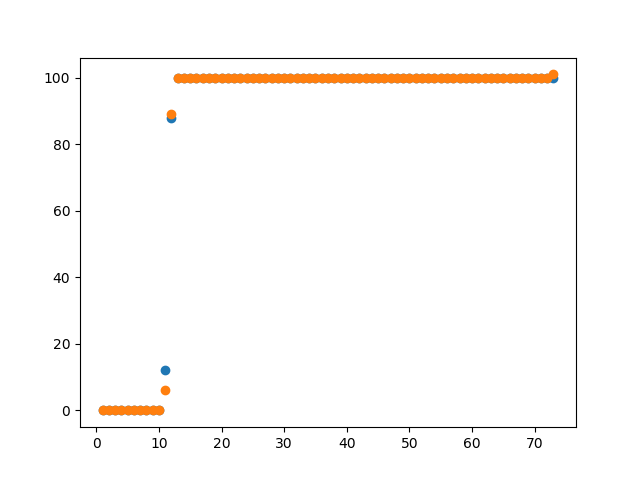

In [20]:
%matplotlib notebook
import matplotlib.pyplot as plt
uni,u_cnt=np.unique(hits["inj"],return_counts=True)
data=np.zeros(len(injlist))
for u_i,u in enumerate(uni):
    a=np.argmin(np.abs(injlist-u))
    data[a]=u_cnt[u_i]
plt.plot(injlist,data,"o")
plt.plot(injlist,cnt,"o")

******************************************INJECTION SCANS -  S-CURVE*****************************************************

In [ ]:
%matplotlib inline
import numpy as np

flavor=3
col=18
startrow=180
rownumber=1
VL=40
VHLrange=40
start_dif=0
repeat=500
delay=500
width=250
noise_en=0
analog_en=1
sleeptime=repeat*0.00005
DUtoe=20.18
#DUtoe=23

xhits = range(start_dif,VHLrange+start_dif+1)

hits =chip.inj_scan_1pix(flavor, col, startrow, VL, VHLrange, start_dif, delay, width, repeat, noise_en, analog_en, sleeptime)
print hits
#plot.plot_scurve(col, startrow, xhits, hits[0], repeat, VHLrange/2+start_dif, 0.5, 10.0, DUtoe,False)

In [ ]:
arg=np.argwhere(np.array(list(chip['CONF_SR']['SET_IDB'].to01()),dtype=int))
low=arg[0,0]
high=arg[-1,0]
dacunits_low=128-low*2
dacunits_high= (high -(128 // 2))*2
if dacunits_low!=dacunits_high:
    logger.info("WARN unusual dac setting")
return dacunits_low